<a href="https://colab.research.google.com/github/yihong1011/TibameML/blob/main/03_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 輸入鳶尾花數據
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# 製做KMeans公式(fit)
from sklearn.cluster import KMeans
# 先分3群
# n_clustrs = K值 => 決定要分幾群
# max_iter => 決定最多執行幾次分群
cluster = KMeans(n_clusters=3, max_iter=1000)
cluster.fit(iris["data"])

KMeans(max_iter=1000, n_clusters=3)

In [ ]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [ ]:
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
# 可以把分群想像成自己打上答案的動作, 打上答案你就可以存起來
# 後續你想要用任何的分類演算法(決策樹...)都可以
import pandas as pd
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["labels"] = cluster.labels_
df["ans"] = pd.DataFrame(iris["target"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels,ans
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,1,2
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [ ]:
# 找合理的K
from sklearn.metrics import silhouette_score

for k in range(2, 20):
  test = KMeans(n_clusters=k)
  test.fit(iris["data"])
  score = silhouette_score(iris["data"], test.labels_)
  print(k, ":", score)

2 : 0.6810461692117462
3 : 0.5528190123564095
4 : 0.49805050499728737
5 : 0.48874888709310566
6 : 0.36784649847122436
7 : 0.3475042328046161
8 : 0.3617900335973811
9 : 0.33806069945271616
10 : 0.3273984585151511
11 : 0.3218535222509228
12 : 0.28122262078723737
13 : 0.296633371101184
14 : 0.2969419008804377
15 : 0.3015566319054408
16 : 0.29009094013425074
17 : 0.29191727224423186
18 : 0.3054567495262253
19 : 0.270411217434633


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


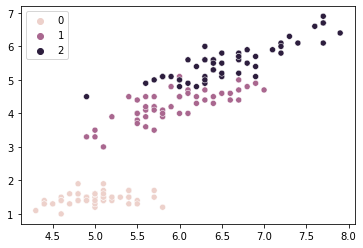

In [ ]:
# 呈現圖像來理解
# 正確答案
import matplotlib.pyplot as plt
import seaborn as sns
s1 = iris["data"][:, 0]# 取花瓣長度
p1 = iris["data"][:, 2]# 取花萼長度
sns.scatterplot(s1, p1, hue=iris["target"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


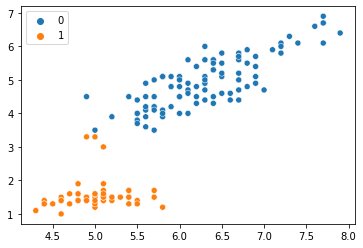

In [ ]:
# 自己的訓練結果
s1 = iris["data"][:, 0]# 取花瓣長度
p1 = iris["data"][:, 2]# 取花萼長度
test = KMeans(n_clusters=2)
test.fit(iris["data"])

sns.scatterplot(s1, p1, hue=test.labels_)
